In [1]:
# Iris dataset
# https://archive.ics.uci.edu/ml/datasets/iris


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#df = pd.read_csv(r'C:\Users\gpoggi\Desktop\Python\Stackup Projects\EDA\iris.data')
#df_names = pd.read_csv(r'C:\Users\gpoggi\Desktop\Python\Stackup Projects\EDA\iris.names')

In [4]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
target = df['target']
df = df.drop(columns='target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [9]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,virginica


In [10]:
df.shape

(150, 5)

In [11]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

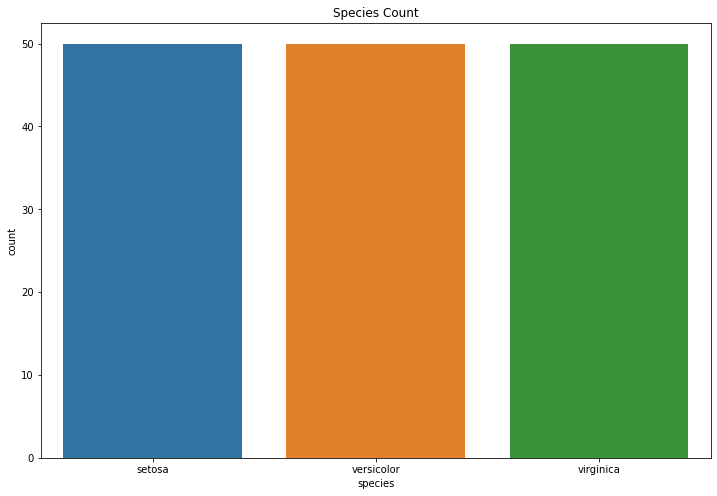

In [12]:
plt.figure(figsize = (12,8))
plt.title('Species Count')
sns.countplot(x='species', data=df)

<Figure size 864x576 with 0 Axes>

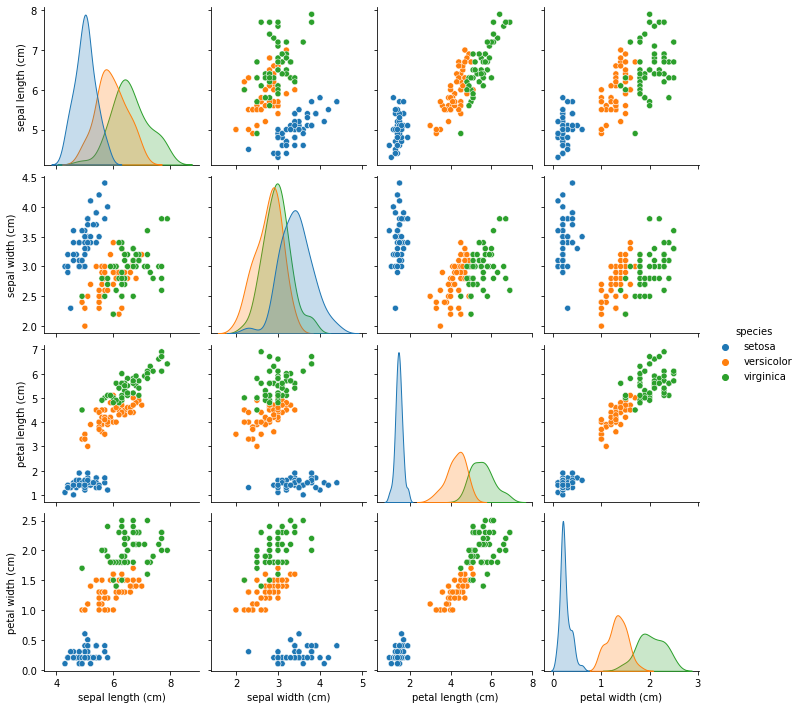

In [13]:
plt.figure(figsize=(12,8))

sns.pairplot(df, hue='species')

<AxesSubplot:>

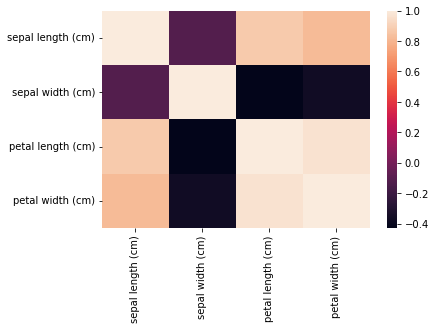

In [14]:
sns.heatmap(df.corr()) #normally after data cleaning

In [15]:
df.columns.unique()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

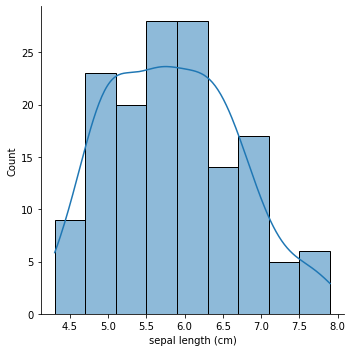

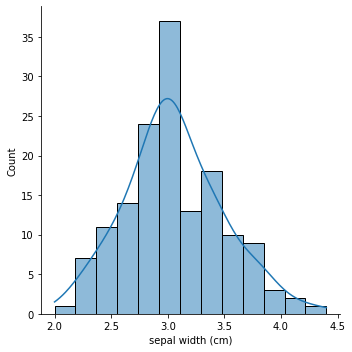

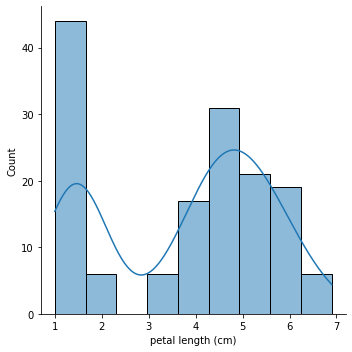

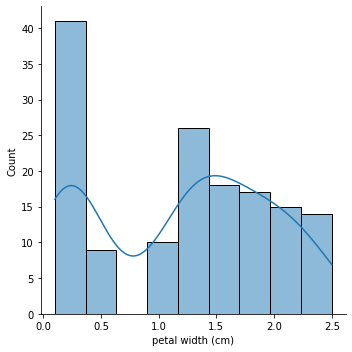

In [16]:
for column_name in df.columns.unique():
    if column_name !='species':
        sns.displot(df[column_name], kde=True)

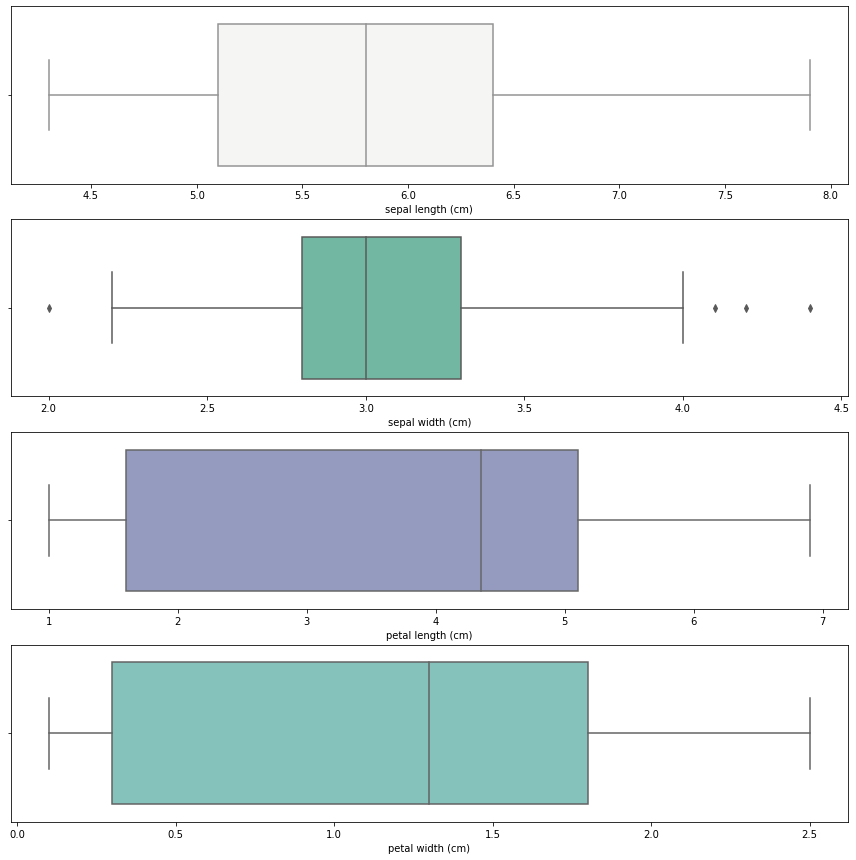

In [17]:
colors =['BrBG_r', 'BuGn_r', 'BuPu_r', 'GnBu_r']
i =0
f, axs = plt.subplots(4, figsize=(15,15))
for col, color in zip(df.columns.unique(), colors):
    if col != 'species':
        sns.boxplot(x = col, data=df, ax =axs[i], palette=color)
        i+=1

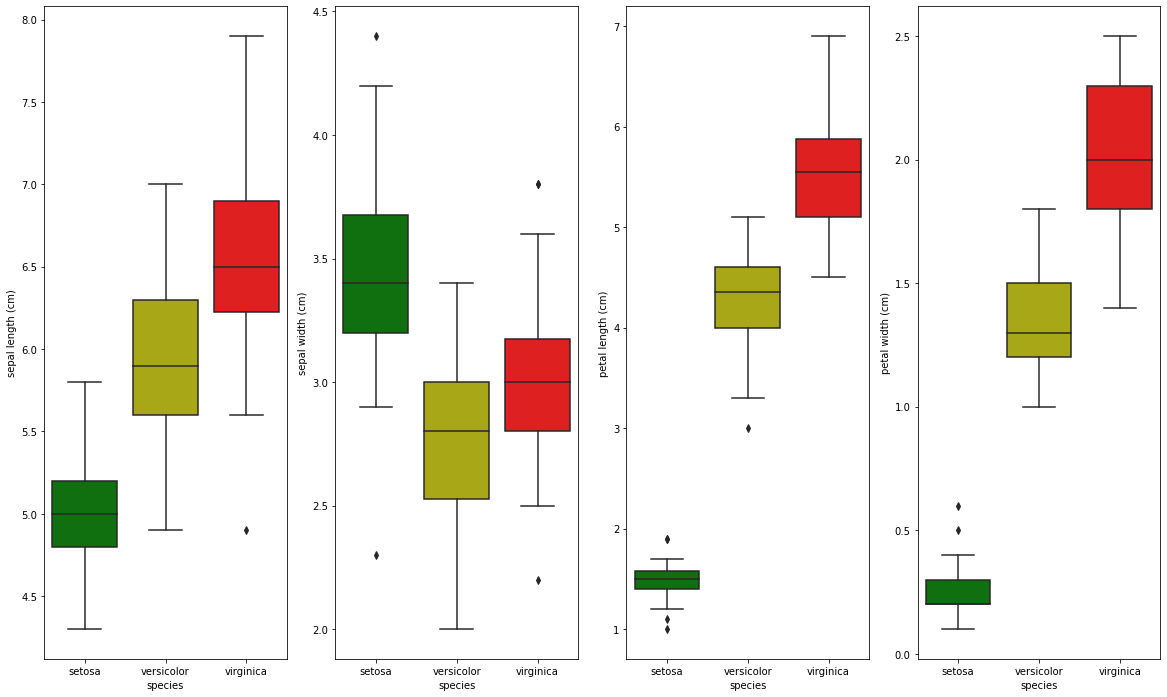

In [18]:
my_pal ={'versicolor': 'y', 'setosa': 'g', 'virginica':'r'}
i=0
f, axs = plt.subplots(1,4,figsize=(20,12))
for col in df.columns.unique():
    if col!= 'species':
        sns.boxplot(x='species', y=col, data=df, ax =axs[i], palette=my_pal)
        i+=1

In [19]:
setosa_df = df.loc[df.loc[:, 'species']=='setosa', :]
setosa_df.loc[:, 'petal length (cm)'].quantile(0.97)

1.806

In [20]:
setosa_df.loc[:, 'petal length (cm)'].quantile(0.03)

1.147

In [21]:
#identify possible outliers
df.loc[(df.loc[:, 'species']=='setosa')&
       (df.loc[:, 'petal length (cm)']> setosa_df.loc[:, 'petal length (cm)'].quantile(0.97))|
       (df.loc[:, 'petal length (cm)']< setosa_df.loc[:, 'petal length (cm)'].quantile(0.03)),
       :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
13,4.3,3.0,1.1,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa
